In [3]:
from langgraph.graph import StateGraph, START, END ## Maintain flow of tasks in application
from typing import TypedDict, Dict

In [4]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    result1: int
    result2: int

def adder_node(state: AgentState) -> AgentState:
    """Node to add two numbers."""
    state['result1'] = state['number1'] + state['number2']
    return state

def subtractor_node(state: AgentState) -> AgentState:
    """Node to subtract two numbers."""
    state['result1'] = state['number1'] - state['number2']
    return state

def adder_node1(state: AgentState) -> AgentState:
    """Node to add two numbers."""
    state['result2'] = state['number3'] + state['number4']
    return state

def subtractor_node1(state: AgentState) -> AgentState:
    """Node to subtract two numbers."""
    state['result2'] = state['number3'] - state['number4']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    """Decide the next node based on the operation."""
    if state['operation1'] == '+':
        return 'adder_node'
    elif state['operation1'] == '-':
        return 'subtractor_node'
    else:
        raise ValueError("Invalid operation")
    
def decide_next_node2(state: AgentState) -> AgentState:
    """Decide the next node based on the operation."""
    if state['operation2'] == '+':
        return 'adder_node1'
    elif state['operation2'] == '-':
        return 'subtractor_node1'
    else:
        raise ValueError("Invalid operation")

In [6]:
graph = StateGraph(AgentState)

graph.add_node('adder_node', adder_node)
graph.add_node('subtractor_node', subtractor_node)
graph.add_node('adder_node1', adder_node1)
graph.add_node('subtractor_node1', subtractor_node1)

graph.add_node('router1', lambda state: state)
graph.add_node('router2', lambda state: state)

graph.add_edge(START, 'router1')

graph.add_conditional_edges(
    'router1', 
    decide_next_node1, 
    {
        'adder_node': 'adder_node',
        'subtractor_node': 'subtractor_node'
    }
)

graph.add_edge('adder_node', 'router2')
graph.add_edge('subtractor_node', 'router2')

graph.add_conditional_edges(
    'router2', 
    decide_next_node2, 
    {
        'adder_node1': 'adder_node1',
        'subtractor_node1': 'subtractor_node1'
    })

graph.add_edge('adder_node1', END)
graph.add_edge('subtractor_node1', END)

app = graph.compile()

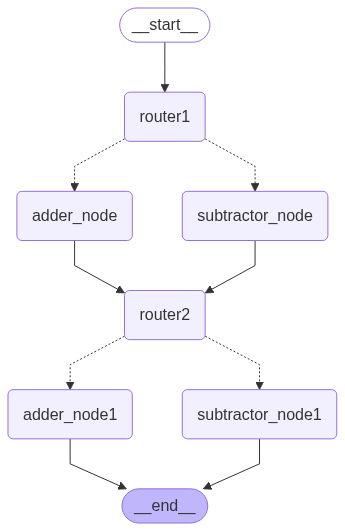

In [12]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
test_state: AgentState = {
    'number1': 10,
    'number2': 5,
    'number3': 20,
    'number4': 15,
    'operation1': '+',
    'operation2': '-',
    'result1': 0,
    'result2': 0
}

res = app.invoke(test_state)
print(res)

{'number1': 10, 'number2': 5, 'number3': 20, 'number4': 15, 'operation1': '+', 'operation2': '-', 'result1': 15, 'result2': 5}
